# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # colo
from sympy import symbols, diff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import log
%matplotlib inline

# Example 1

## $f(x) =x^2 + x+1$

In [2]:
def f(x):
    return x**2+x+1

In [3]:
# make data
x_1= np.linspace(start=-3,stop=3,num=100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

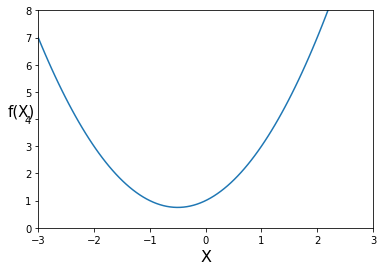

In [4]:
#Plot
plt.plot(x_1,f(x_1))
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(X)',fontsize=15,rotation=0)

plt.show()

## Slope and Derivatives

In [5]:
def df(x):
    return 2*x+1

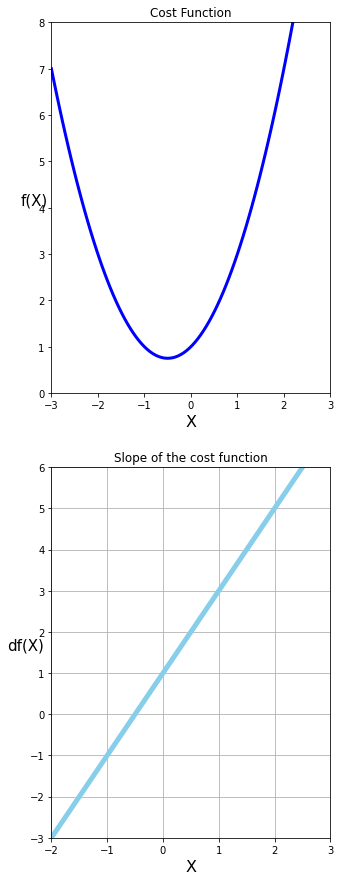

In [6]:
#Plot Function and derivative side by side
plt.figure(figsize=[5,15])
plt.subplot(2,1,1)

# chart 1: cost function
plt.plot(x_1,f(x_1),c='blue',linewidth=3)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('Cost Function')
plt.xlabel('X',fontsize=16)
plt.ylabel('f(X)',fontsize=15,rotation=0)

# chart 2: Derivative
plt.subplot(2,1,2)
plt.plot(x_1,df(x_1),linewidth=5,c='skyblue')
plt.title('Slope of the cost function')
plt.xlabel('X',fontsize=16)
plt.ylabel('df(X)',fontsize=15,rotation=0)
plt.xlim(-2,3)
plt.ylim(-3,6 )
plt.grid()

plt.show()

## Python Loops & Gradient Descent

In [7]:
#  Gradient Descent

new_x=3
previous_x=0
step_multiplier=0.1
precision=0.0000001
x_list=[new_x]
slope_list=[df(new_x)]

for n in range(500):
    previous_x=new_x
    gradient=df(previous_x)
    new_x=previous_x-step_multiplier*gradient
    step_size=abs(new_x-previous_x)
#     print(step_size)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size<precision:
        print('Loop run this many time',n)
        break
print('Local minimum occurs at : ',new_x)
print('Slope or df(x) value at this point is: ',df(new_x))
print('f(x) value or cost at this point: ',f(new_x))

Loop run this many time 71
Local minimum occurs at :  -0.4999996314069791
Slope or df(x) value at this point is:  7.371860417659803e-07
f(x) value or cost at this point:  0.7500000000001359


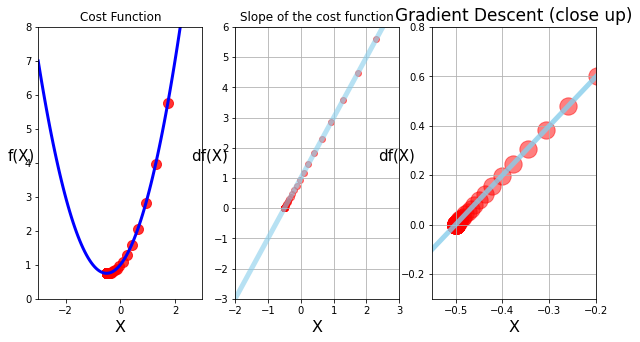

In [8]:
#Superimpose the gradient descent calculation
plt.figure(figsize=[10,5])
plt.subplot(1,3,1)

# chart 1: cost function
plt.plot(x_1,f(x_1),c='blue',linewidth=3)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('Cost Function')
plt.xlabel('X',fontsize=16)
plt.ylabel('f(X)',fontsize=15,rotation=0)
values=np.array(x_list)
plt.scatter(x_list,f(values), c='red',s=100,alpha=0.8)

# chart 2: Derivative
plt.subplot(1,3,2)
plt.plot(x_1,df(x_1),linewidth=5,c='skyblue',alpha=0.6)
plt.title('Slope of the cost function')
plt.xlabel('X',fontsize=16)
plt.ylabel('df(X)',fontsize=15,rotation=0)
plt.xlim(-2,3)
plt.ylim(-3,6 )
plt.grid()
plt.scatter(x_list,slope_list,c='red',alpha=0.5)


# chart 2: Derivative (close up)
plt.subplot(1,3,3)
plt.plot(x_1,df(x_1),linewidth=5,c='skyblue',alpha=0.8)
plt.title('Gradient Descent (close up)',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('df(X)',fontsize=15,rotation=0)
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8 )
plt.grid()
plt.scatter(x_list,slope_list,c='red',s=300,alpha=0.5)

plt.show()

## Example 2- Multiple Minima vs Initial Guess & Advanced Funcitons
## $$g(x) =x^4-4x^2+5$$

In [9]:
def g(x):
    return x**4-4*x**2+5

In [10]:
def dg(x):
    return 4*(x**3)-8*x

In [11]:
x_2=np.linspace(-2,2,1000)
x_2

array([-2.        , -1.995996  , -1.99199199, -1.98798799, -1.98398398,
       -1.97997998, -1.97597598, -1.97197197, -1.96796797, -1.96396396,
       -1.95995996, -1.95595596, -1.95195195, -1.94794795, -1.94394394,
       -1.93993994, -1.93593594, -1.93193193, -1.92792793, -1.92392392,
       -1.91991992, -1.91591592, -1.91191191, -1.90790791, -1.9039039 ,
       -1.8998999 , -1.8958959 , -1.89189189, -1.88788789, -1.88388388,
       -1.87987988, -1.87587588, -1.87187187, -1.86786787, -1.86386386,
       -1.85985986, -1.85585586, -1.85185185, -1.84784785, -1.84384384,
       -1.83983984, -1.83583584, -1.83183183, -1.82782783, -1.82382382,
       -1.81981982, -1.81581582, -1.81181181, -1.80780781, -1.8038038 ,
       -1.7997998 , -1.7957958 , -1.79179179, -1.78778779, -1.78378378,
       -1.77977978, -1.77577578, -1.77177177, -1.76776777, -1.76376376,
       -1.75975976, -1.75575576, -1.75175175, -1.74774775, -1.74374374,
       -1.73973974, -1.73573574, -1.73173173, -1.72772773, -1.72

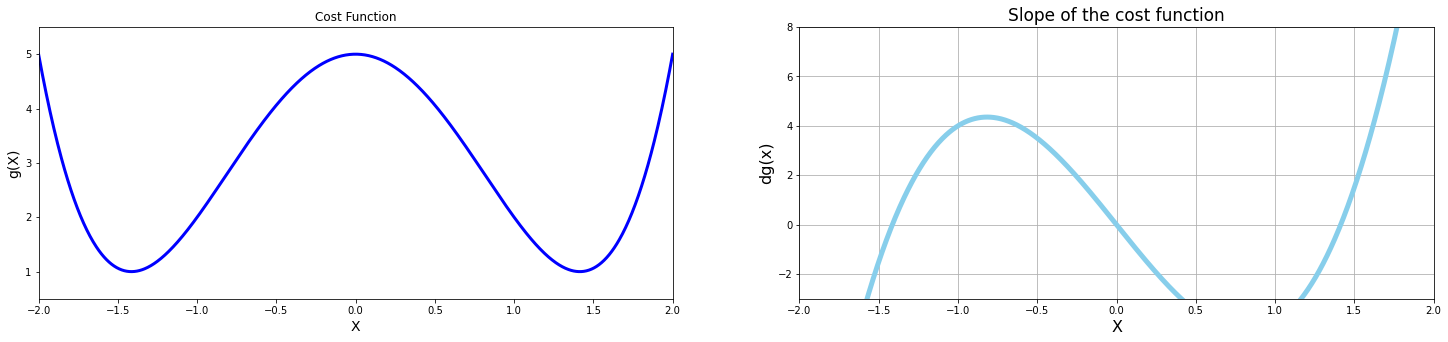

In [12]:
plt.figure(figsize=[25,5])

plt.subplot(1,2,1)

# chart 1:
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost Function')
plt.xlabel('X',fontsize=14)
plt.ylabel('g(X)',fontsize=14)
plt.plot(x_2,g(x_2),c='blue',linewidth=3)


# chart 2:
plt.subplot(1,2,2)
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()

plt.xlim(-2,2)
plt.ylim(-3,8)

plt.plot(x_2,dg(x_2),c='skyblue',linewidth=5)

## Gradient Descent as a Python Function

In [13]:
#  Gradient Descent
def gradient_descent(derivative_func,initial_guess,multiplier=0.02,precision=0.001,max_iter=300):
#     ctrl + ]
    new_x=initial_guess
    
    x_list=[new_x]
    slope_list=[derivative_func(new_x)]

    for n in range(max_iter):
        previous_x=new_x
        gradient=derivative_func(previous_x)
        new_x=previous_x-multiplier*gradient
        step_size=abs(new_x-previous_x)
    #     print(step_size)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size<precision:
            break
    return new_x,x_list,slope_list

In [14]:
local_min,list_x,deriv_list=gradient_descent(dg,0.5,0.02,0.001)
print('local',local_min)
print('number of steps:',len(list_x))

local 1.4122375085019094
number of steps: 23


In [15]:
local_min,list_x,deriv_list=gradient_descent(dg,-0.5,0.02,0.001)
print('local',local_min)
print('number of steps:',len(list_x))

local -1.4122375085019094
number of steps: 23


In [16]:
local_min,list_x,deriv_list=gradient_descent(dg,-0.1)
print('local',local_min)
print('number of steps:',len(list_x))

local -1.4120887490901561
number of steps: 34


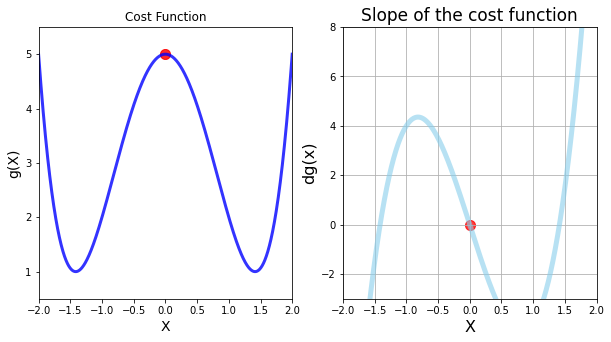

In [17]:
plt.figure(figsize=[10,5])
local_min,list_x,deriv_list=gradient_descent(dg,0)
plt.subplot(1,2,1)

# chart 1:
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost Function')
plt.xlabel('X',fontsize=14)
plt.ylabel('g(X)',fontsize=14)
plt.plot(x_2,g(x_2),c='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)),c='red',s=100,alpha=0.6)

# chart 2:
plt.subplot(1,2,2)
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()

plt.xlim(-2,2)
plt.ylim(-3,8)

plt.plot(x_2,dg(x_2),c='skyblue',linewidth=5,alpha=0.6)
plt.scatter(list_x,deriv_list,c='red',s=100,alpha=0.5)

## Example 3 - Divergence, Overflow and Python Tuples 
## $$h(x)= x^5 -2x^4+2$$

In [18]:
# Make Data

x_3=np.linspace(start=-2.5,stop=2.5,num=1000)

def h(x):
    return x**5-2*(x**4)+2

def dh(x):
    return 5*x**4-8*x**3

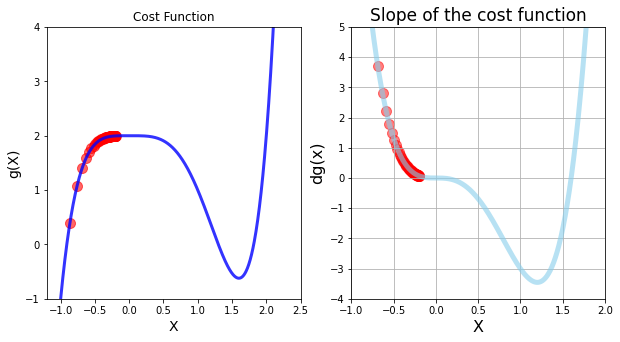

In [19]:
plt.figure(figsize=[10,5])
local_min,list_x,deriv_list=gradient_descent(dh,-0.2,max_iter=70)
plt.subplot(1,2,1)

# chart 1:
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.title('Cost Function')
plt.xlabel('X',fontsize=14)
plt.ylabel('g(X)',fontsize=14)
plt.plot(x_3,h(x_3),c='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,h(np.array(list_x)),c='red',s=100,alpha=0.6)

# chart 2:
plt.subplot(1,2,2)
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()

plt.xlim(-1,2)
plt.ylim(-4,5)

plt.plot(x_3,dh(x_3),c='skyblue',linewidth=5,alpha=0.6)
plt.scatter(list_x,deriv_list,c='red',s=100,alpha=0.5)

In [20]:
print('Local Min',local_min)
print('Cost at min:',h(local_min))
print('Number of steps: ',len(list_x))

Local Min -2071072.4470816324
Cost at min: -3.810455326061589e+31
Number of steps:  71


In [21]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## The learning Rate

Number of steps  14


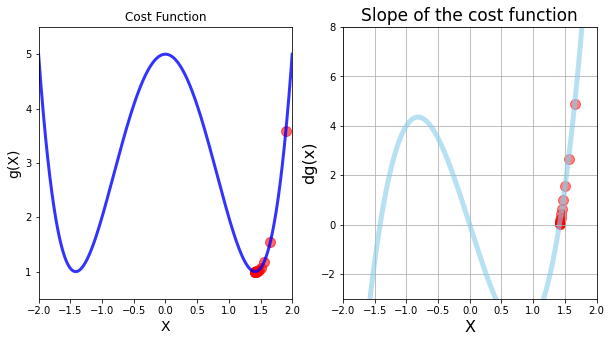

In [22]:
plt.figure(figsize=[10,5])
local_min,list_x,deriv_list=gradient_descent(dg,initial_guess=1.9,
                                            multiplier=0.02,max_iter=500)
plt.subplot(1,2,1)

# chart 1:
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost Function')
plt.xlabel('X',fontsize=14)
plt.ylabel('g(X)',fontsize=14)
plt.plot(x_2,g(x_2),c='blue',linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)),c='red',s=100,alpha=0.6)

# chart 2:
plt.subplot(1,2,2)
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()

plt.xlim(-2,2)
plt.ylim(-3,8)

plt.plot(x_2,dg(x_2),c='skyblue',linewidth=5,alpha=0.6)
plt.scatter(list_x,deriv_list,c='red',s=100,alpha=0.5)

print('Number of steps ',len(list_x))

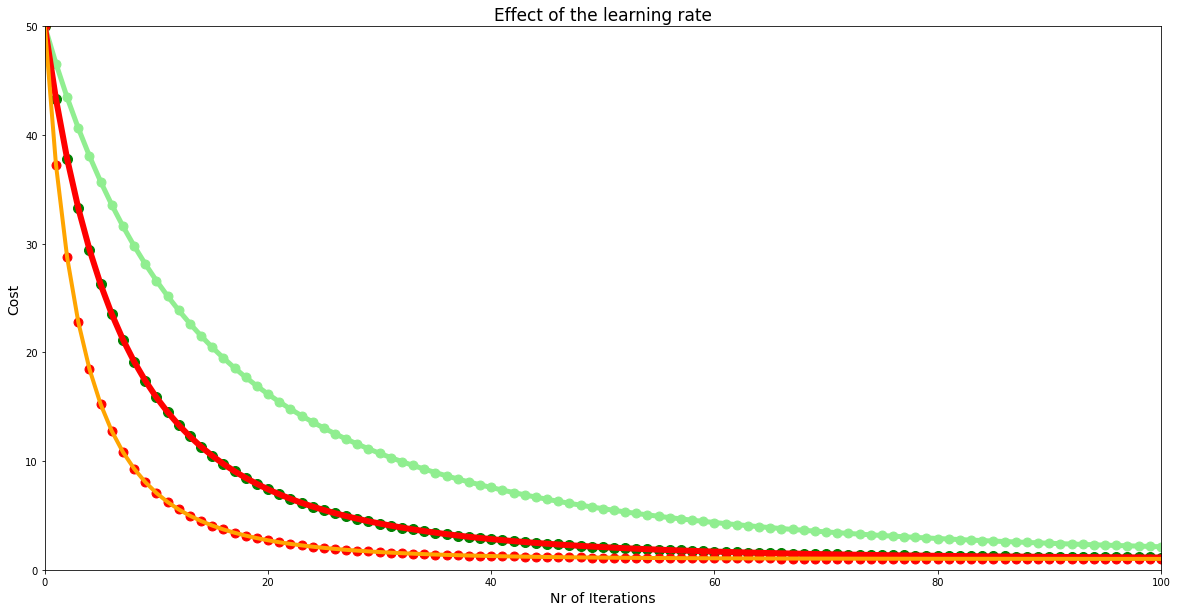

In [23]:
n=100
plt.figure(figsize=[20,10])
low_gamma=gradient_descent(dg,initial_guess=3,
                                            multiplier=.0005,precision=0.0001,max_iter=n)
# chart 1:
plt.xlim(0,n)
plt.ylim(0,50)
plt.title('Effect of the learning rate',fontsize=17)
plt.xlabel('Nr of Iterations',fontsize=14)
plt.ylabel('Cost',fontsize=14)

# Values for our charts
# 1) y Axis Data: convert the list to numpy arrays
low_values=np.array(low_gamma[1])

# 2) X Axis  Data: create the list form 0 to n+1
iteration_list=list(range(0,n+1))
# Plotting the learning rate
plt.plot(iteration_list,g(low_values),c='lightgreen',linewidth=5)
plt.scatter(iteration_list,g(low_values),c='lightgreen',s=80)

mid_gamma=gradient_descent(dg,initial_guess=3,multiplier=0.001,max_iter=100)
mid_values=np.array(mid_gamma[1])
iteration_list=list(range(0,n+1))


plt.plot(iteration_list,g(mid_values),c='red',linewidth=6)
plt.scatter(iteration_list,g(mid_values),c='green',s=100)

high_gamma=gradient_descent(dg,initial_guess=3,multiplier=0.002,max_iter=100,precision=0.0001)
high_values=np.array(high_gamma[1])
iteration_list=list(range(0,n+1))

plt.plot(iteration_list,g(high_values),c='orange',linewidth=4)
plt.scatter(iteration_list,g(high_values),c='red',s=80)

plt.show()

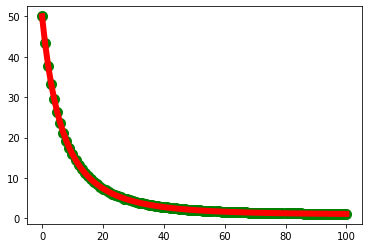

In [24]:
mid_gamma=gradient_descent(dg,initial_guess=3,multiplier=0.001,max_iter=100)
mid_values=np.array(mid_gamma[1])
iteration_list=list(range(0,n+1))


plt.plot(iteration_list,g(mid_values),c='red',linewidth=6)
plt.scatter(iteration_list,g(mid_values),c='green',s=100)


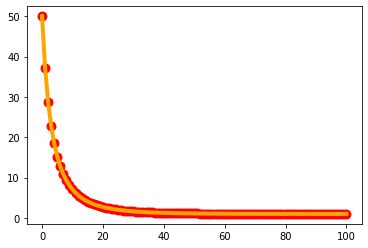

In [25]:
high_gamma=gradient_descent(dg,initial_guess=3,multiplier=0.002,max_iter=100,precision=0.0001)
high_values=np.array(high_gamma[1])
iteration_list=list(range(0,n+1))

plt.plot(iteration_list,g(high_values),c='orange',linewidth=4)
plt.scatter(iteration_list,g(high_values),c='red',s=80)

## Example 4 Data Viz with 3D charts

## Minimise $$f(x,y)=\frac{1}{3^{-x^2 - y^2}+1}$$

Minimise $$f(x,y) =\frac{1}{r+1} $$ where $r$ is $3^{-x^2 - y^2}$

In [26]:
def f(x,y):
    r=3**(-x**2 - y**2)
    return 1/(r+1)

In [27]:
# Make our x and y data
x_4=np.linspace(start=-2,stop=2,num=200)
y_4=np.linspace(start=-2,stop=2,num=200)
print('Shape of x array',x_4.shape)

x_4,y_4 = np.meshgrid(x_4,y_4)
x_4.shape

Shape of x array (200,)


(200, 200)

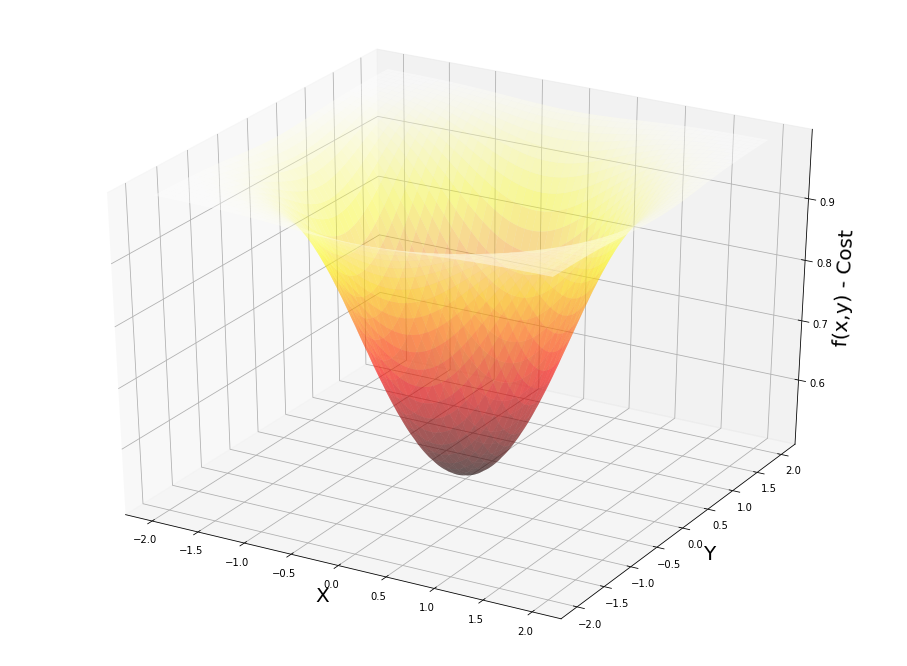

In [28]:
#  Genearting 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.hot, alpha=.4)

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y) - Cost',fontsize=20)

plt.show()

## Partial Derivatives & Symbolic Computation

In [29]:
a,b=symbols('x,y')
print('Our cost function is: ',f(a,b))
print('Partial dervativ,b:e wrt x is: ',diff(f(a,b),a))
print('Value of f(x,y) at x=1.8,y=1.0 is: ',f(a,b).evalf(subs={a:1.8,b:1.0})) # Python DIctionary

Our cost function is:  1/(3**(-x**2 - y**2) + 1)
Partial dervativ,b:e wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8,y=1.0 is:  0.990604794032582


In [30]:
print('Value of Partial derivative wrt x: ',diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

Value of Partial derivative wrt x:  0.0368089716197505


# Batch Gradient Descent with Sympy

## Partial Derivatives 
## $$\frac{\partial f}{\partial x} =\frac{ 2x \ln(3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2} +1 \right)^2}$$ 
## $$\frac{\partial f}{\partial y} =\frac{ 2 \ln(3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2} +1 \right)^2}$$ 

In [31]:
# Setup
multiplier = 0.1
max_iter=500
params = np.array([1.8,1.0]) #Initial guess

for n in range(max_iter):
    gradient_x=diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y=diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients=np.array([gradient_x,gradient_y])
    params = params-multiplier * gradients
    
# Results
print('Values in gradient array',gradients)
print('Minimum occurs at x value of: ',params[0])
print('Minimum occurs at y value of: ',params[1])
print('The cost is: ',f(params[0],params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [32]:
# Partial Derivative function example 4
def fpx(x,y):
    r=3**(-x**2-y**2)
    return 2*x*log(3)*r / (r+1)**2

def fpy(x,y):
    r=3**(-x**2-y**2)
    return 2*y*log(3)*r / (r+1)**2

In [33]:
fpx(1.8,1.0)

0.036808971619750504

In [34]:
# Setup
multiplier = 0.1
max_iter=500
params = np.array([1.8,1.0]) #Initial guess

for n in range(max_iter):
    gradient_x=fpx(params[0],params[1])
    gradient_y=fpy(params[0],params[1])
    gradients=np.array([gradient_x,gradient_y])
    params = params-multiplier * gradients
    
# Results
print('Values in gradient array',gradients)
print('Minimum occurs at x value of: ',params[0])
print('Minimum occurs at y value of: ',params[1])
print('The cost is: ',f(params[0],params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D gradient descent & Adv Numpy Arrays

In [35]:
# Setup
multiplier = 0.1
max_iter=200
params = np.array([1.8,1.0]) #Initial guess
values_array = params.reshape(1,2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x=fpx(params[0],params[1])
    gradient_y=fpy(params[0],params[1])
    gradients=np.array([gradient_x,gradient_y])
    params = params-multiplier * gradients
#     values_array=np.append(values_array,params.reshape(1,2),axis=0)
    values_array=np.concatenate((values_array,params.reshape(1,2)),axis=0)
    
# Results
print('Values in gradient array',gradients)
print('Minimum occurs at x value of: ',params[0])
print('Minimum occurs at y value of: ',params[1])
print('The cost is: ',f(params[0],params[1]))

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


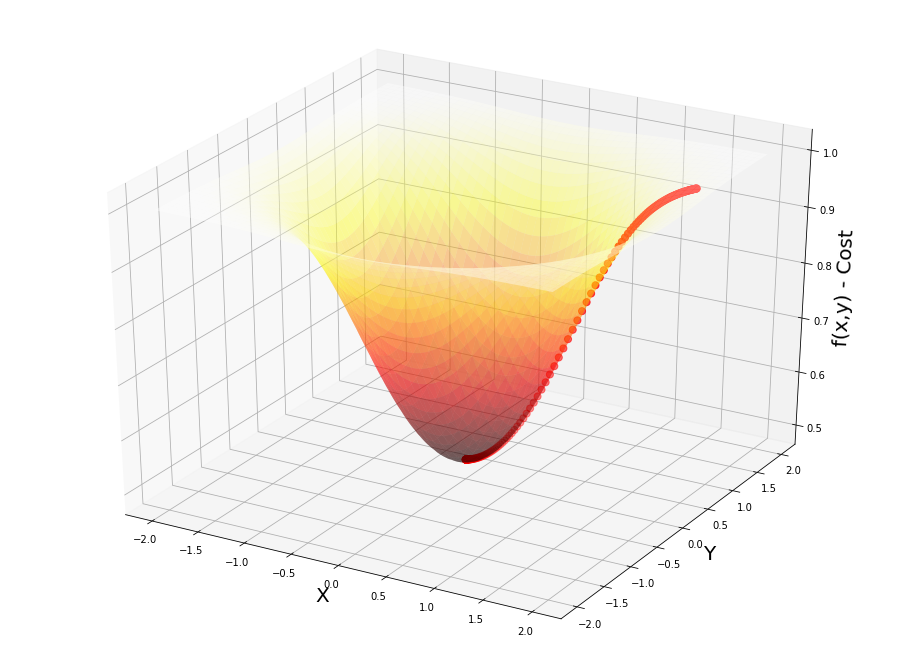

In [36]:
#  Genearting 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.hot, alpha=.4)
ax.scatter(values_array[:,0], values_array[:, 1],
           f(values_array[:,0],values_array[:,1]),s=50,c='red')
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y) - Cost',fontsize=20)

plt.show()

In [37]:
# Advanced numpy array practice
kirk = np.array([['Captain','Guitar']])
kirk.shape

hs_band  = np.array([['Black Thought','MC'],['Questlove','Drums']])
hs_band.shape
hs_band[1][0]
the_root=np.append(arr=hs_band,values=kirk,axis=0)
print(the_root)
print()
print(the_root[:, 0])

the_root=np.append(arr=the_root,values=[['Malik B','MC']],axis=0)
print(the_root)
print(the_root[:,1])

[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]

['Black Thought' 'Questlove' 'Captain']
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']
 ['Malik B' 'MC']]
['MC' 'Drums' 'Guitar' 'MC']


# Example - 5 Working With Data & Real COst Function
## Mean Squared Error: a cost fucnction for regression problems
### $$ RSS = \sum_{i=1}^{n} \big(y^{(i)} -h_\theta x^{(i)} \big)^2  $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} -h_\theta x^{(i)} \big)^2  $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y} \big)^2  $$

In [38]:
# make sample data
x_5=np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y_5=np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)

print(x_5.shape)
print(y_5.shape)

(7, 1)
(7, 1)


In [39]:
# Quick linear regression
regr=LinearRegression()
regr.fit(x_5,y_5)

LinearRegression()

In [40]:
print('Theta 0:',regr.intercept_[0])
print('Theta 1:',regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


Text(0, 0.5, 'y values')

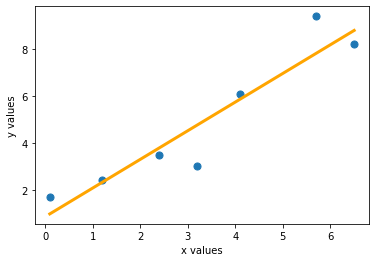

In [41]:
plt.scatter(x_5,y_5,s=50)
plt.plot(x_5,regr.predict(x_5),c='orange',linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')

In [42]:
#  y_hat = theta0 +theta1*x
y_hat=0.8475351486029545 + 1.2227264637835913 * x_5
print(y_hat)
print(y_5)

[[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
[[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [43]:
#  challenge: 
def MSE(y,y_hat):
    
#     return 1/(y.size)*sum((y-y_hat)**2)
    return (np.average((y-y_hat)**2,axis=0))

In [44]:
print(MSE(y_5,y_hat))
print(mean_squared_error(y_5,y_hat))
print(mean_squared_error(y_5,regr.predict(x_5)))

[0.94796558]
0.9479655759794577
0.9479655759794577


## 3D Plot fot the MSE Cost Function

## Make data for theta

In [45]:
nr_thetas=200
th_0=np.linspace(start=-1,stop=3,num=nr_thetas)
th_1=np.linspace(start=-1,stop=3,num=nr_thetas)
plot_t0,plot_t1 = np.meshgrid(th_0,th_1)
plot_t0.shape

(200, 200)

## Calc MSE using nested for loops

In [46]:
plot_cost = np.zeros((nr_thetas,nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
#         print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j]=MSE(y_5,y_hat)
print(plot_t0.shape)
print(plot_t1.shape)
print(plot_cost.shape)

(200, 200)
(200, 200)
(200, 200)


In [47]:
# Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'Value of i is {i} and j is {j}')

Value of i is 0 and j is 0
Value of i is 0 and j is 1
Value of i is 0 and j is 2
Value of i is 1 and j is 0
Value of i is 1 and j is 1
Value of i is 1 and j is 2
Value of i is 2 and j is 0
Value of i is 2 and j is 1
Value of i is 2 and j is 2


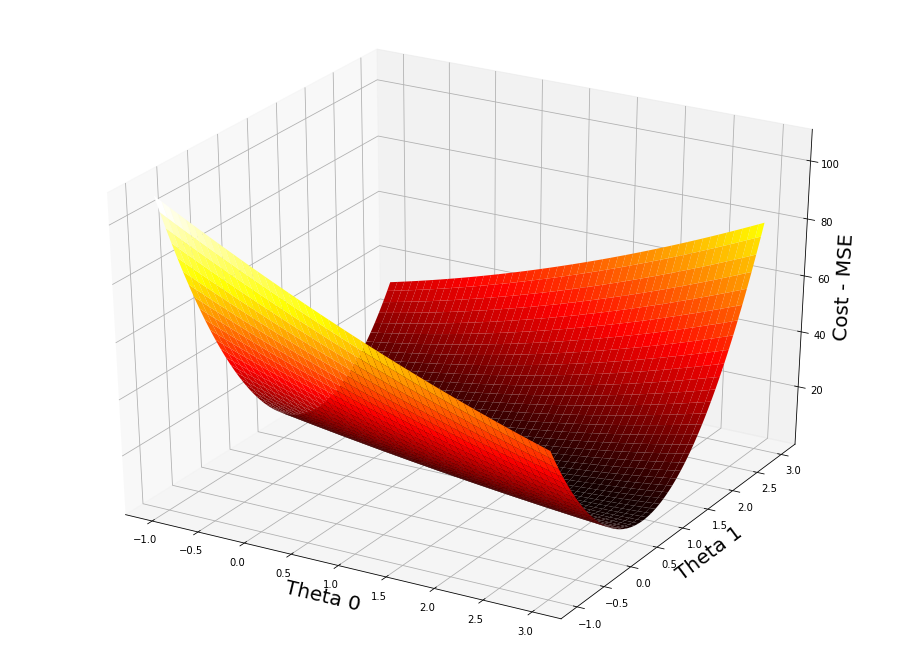

In [48]:
# plotting mse
fig = plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')

ax.set_xlabel('Theta 0',fontsize=20)
ax.set_ylabel('Theta 1',fontsize=20)
ax.set_zlabel('Cost - MSE',fontsize=20)
ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.hot)

In [49]:
print('Min value of plot_cost',plot_cost.min())
ij_min=np.unravel_index(indices=plot_cost.argmin(),dims=plot_cost.shape)
print('min occurs for Theta0 at ij_min',ij_min)
print('min occurs for Theta0 at plot_t0[111][91]',plot_t0[111][91])


Min value of plot_cost 0.9483826526747164
min occurs for Theta0 at ij_min (111, 91)
min occurs for Theta0 at plot_t0[111][91] 0.829145728643216


/home/vaibhav/pandas_dir/pandas_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  


In [50]:
print('min occurs for Theta0 at plot_t1[111][91]',plot_t1[111][91])

min occurs for Theta0 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE wrt $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)}\big) $$

## MSE & Gradient Descent

In [51]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta 1 at index1)
def grad(x,y,thetas):
    n=y.size
    theta0_slope = (-2/n)* sum(y-thetas[0]-thetas[1]*x)
    theta1_slope = (-2/n)* sum((y-thetas[0]-thetas[1]*x)*x)    
#     return np.array(theta0_slope[0],theta1_slope[0])
#     return np.append(arr=theta0_slope,values=theta1_slope)
    return np.concatenate((theta0_slope,theta1_slope),axis=0)

In [52]:
multiplier=0.01
thetas=np.array([2.9,2.9])

# collect data points for scatter plots
plot_vals=thetas.reshape(1,2)
mse_vals=MSE(y_5,thetas[0]+thetas[1]*x_5)

for i in range(1000):
    thetas = thetas-multiplier *grad(x_5,y_5,thetas)
    
#     Append the new value to our numpy arrays
    plot_vals=np.concatenate((plot_vals, thetas.reshape(1,2)),axis=0)
    mse_vals = np.append(arr = mse_vals, values=MSE(y_5,thetas[0]+thetas[1]*x_5))
    
print(thetas[0])
print(thetas[1])
print(MSE(y_5,thetas[0]+thetas[1]*x_5))

0.8532230461743415
1.2214935332607393
[0.94797511]


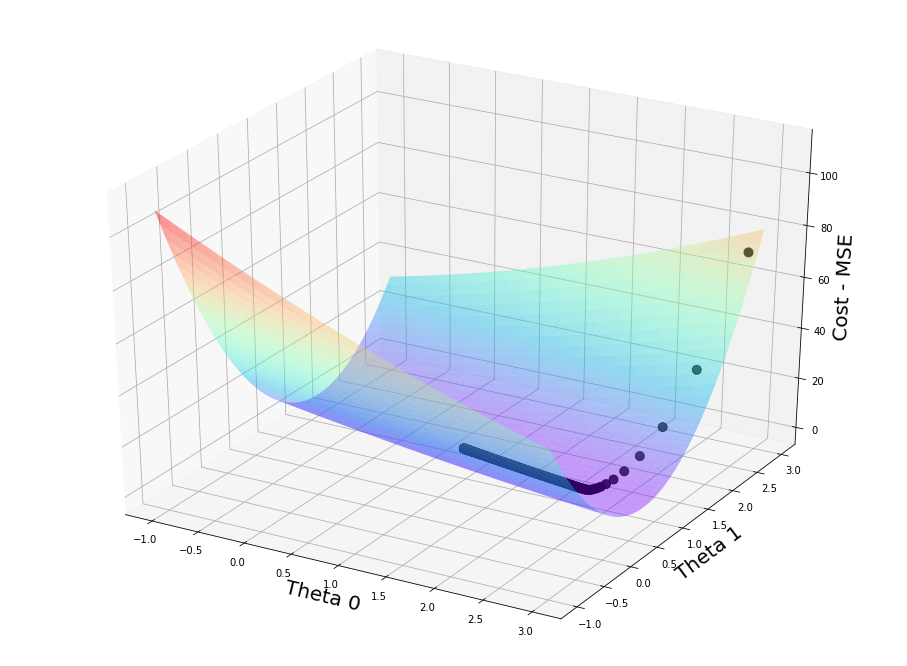

In [53]:
# plotting mse
fig = plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')

ax.set_xlabel('Theta 0',fontsize=20)
ax.set_ylabel('Theta 1',fontsize=20)
ax.set_zlabel('Cost - MSE',fontsize=20)

ax.scatter(plot_vals[:,0],plot_vals[:,1],mse_vals,s=80,c='black')
ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.rainbow,alpha=0.4)